# Experimental Planning Applied to Energetic Process - ENE108

Dr. Fernando Gasi; Dra. Graziella Colato Antonio; Dra. Juliana Tófano de Campos Leite Toneli


# Article Selected


The economical feasibility of ethanol production using lignocellulosic biomass is primarilly dependent on the cost of the required enzymes, e.g. celullase. By this reason there is and increasing interest in optimizing the process of obtaining this enzymes. In the article [Nitrogen Source Optimization for Cellulase Production
by Penicillium funiculosum, using a Sequential
Experimental Design Methodology and the Desirability
Function](https://link.springer.com/content/pdf/10.1007/s12010-009-8875-6.pdf?pdf=button), the authors used three sucessice designs of experiments to optimize celullase production. The incremental methodology consists of sucessively cut off irrelevant terms in models obtained by a $2^4$ and $2^3$ factorial designs and finally perform ANOVA in a central composite rotational design. 

# Variables and Levels

# Responses

# Matrices of experiments

# ANOVA

# Hypotesis

The main hypotesis is that a sequential methodology for experimental design can be efficiently used to optmizethe the production of celullase by *Penicillinum funiculosum*. 

# Cellulalse Production Process

For optimization of cellulase production, the independent variables considered were 4 different sources of nitrogen:

- Urea (`Urea`)
- Ammonium Sulfate (`AmmoniumSulfate`)
- Peptone (`Peptone`)
- Yeast Extract (`YeastExtract`)

# $2^4$ Factorial Experiment

for the first experiment all independent variables was considered on a factorial design with two levels and three central points as described in the table below

| Urea | AmmoniumSulfate | Peptone | YeastExtract | FPase | CMCase | BetaGlucosidase |
|-----:|----------------:|--------:|-------------:|------:|-------:|-----------------|
|   -1 |              -1 |      -1 |           -1 |    39 |  1.328 | 170             |
|    1 |              -1 |      -1 |           -1 |    87 |  1.699 | 122             |
|   -1 |               1 |      -1 |           -1 |    48 |  1.332 | 473             |
|    1 |               1 |      -1 |           -1 |    71 |  1.979 | 511             |
|   -1 |              -1 |       1 |           -1 |    43 |  1.458 | 156             |
|    1 |              -1 |       1 |           -1 |    84 |  2.189 | 204             |
|   -1 |               1 |       1 |           -1 |    45 |  1.343 | 385             |
|    1 |               1 |       1 |           -1 |   112 |  1.707 | 288             |
|   -1 |              -1 |      -1 |            1 |    19 |  1.257 | 114             |
|    1 |              -1 |      -1 |            1 |   146 |  2.148 | 116             |
|   -1 |               1 |      -1 |            1 |    50 |  1.592 | 244             |
|    1 |               1 |      -1 |            1 |    92 |  1.726 | 126             |
|   -1 |              -1 |       1 |            1 |   107 |  1.203 | 72              |
|    1 |              -1 |       1 |            1 |   172 |  2.261 | 210             |
|   -1 |               1 |       1 |            1 |    62 |  1.434 | 234             |
|    1 |               1 |       1 |            1 |    82 |  1.848 | 154             |
|    0 |               0 |       0 |            0 |    75 |  1.726 | 223             |
|    0 |               0 |       0 |            0 |    70 |  1.782 | 219             |
|    0 |               0 |       0 |            0 |    89 |  1.753 | 226             |

In [2]:
from urllib.request import urlopen
import numpy as np

# np.set_printoptions(precision=4, suppress=True)

import pandas as pd

# pd.set_option('display.width', 100)

import matplotlib.pyplot as plt

from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm

from io import StringIO

In [21]:
factor_24_table_string = """
U;A;P;Y;FPase;CMCase;BetaGlucosidase
-1;-1;-1;-1;39;1.328;170
1;-1;-1;-1;87;1.699;122
-1;1;-1;-1;48;1.332;473
1;1;-1;-1;71;1.979;511
-1;-1;1;-1;43;1.458;156
1;-1;1;-1;84;2.189;204
-1;1;1;-1;45;1.343;385
1;1;1;-1;112;1.707;288
-1;-1;-1;1;19;1.257;114
1;-1;-1;1;146;2.148;116
-1;1;-1;1;50;1.592;244
1;1;-1;1;92;1.726;126
-1;-1;1;1;107;1.203;72
1;-1;1;1;172;2.261;210
-1;1;1;1;62;1.434;234
1;1;1;1;82;1.848;154
0;0;0;0;75;1.726;223
0;0;0;0;70;1.782;219
0;0;0;0;89;1.753;226
"""

factor_24_table= pd.read_table(StringIO(factor_24_table_string), delimiter=';')

In [22]:

                           
factor_24_levels = StringIO("""
    -1  0  1
U   0.15    0.30    0.45
A   0.70    1.40    2.10
P   0.40    0.75    1.10
Y   0.13    0.26    0.38
""")


U = factor_24_table.Urea
A = factor_24_table.AmmoniumSulfate
P = factor_24_table.Peptone
Y = factor_24_table.YeastExtract
FPase = factor_24_table.FPase
CMCase = factor_24_table.CMCase
Bglucosidase = factor_24_table.BetaGlucosidase

factor_24_levels = pd.read_table(factor_24_levels, delimiter='\s+').T
factor_24_levels

AttributeError: 'DataFrame' object has no attribute 'Urea'

In [23]:
print(factor_24_table.to_markdown())

|    |   U |   A |   P |   Y |   FPase |   CMCase |   BetaGlucosidase |
|---:|----:|----:|----:|----:|--------:|---------:|------------------:|
|  0 |  -1 |  -1 |  -1 |  -1 |      39 |    1.328 |               170 |
|  1 |   1 |  -1 |  -1 |  -1 |      87 |    1.699 |               122 |
|  2 |  -1 |   1 |  -1 |  -1 |      48 |    1.332 |               473 |
|  3 |   1 |   1 |  -1 |  -1 |      71 |    1.979 |               511 |
|  4 |  -1 |  -1 |   1 |  -1 |      43 |    1.458 |               156 |
|  5 |   1 |  -1 |   1 |  -1 |      84 |    2.189 |               204 |
|  6 |  -1 |   1 |   1 |  -1 |      45 |    1.343 |               385 |
|  7 |   1 |   1 |   1 |  -1 |     112 |    1.707 |               288 |
|  8 |  -1 |  -1 |  -1 |   1 |      19 |    1.257 |               114 |
|  9 |   1 |  -1 |  -1 |   1 |     146 |    2.148 |               116 |
| 10 |  -1 |   1 |  -1 |   1 |      50 |    1.592 |               244 |
| 11 |   1 |   1 |  -1 |   1 |      92 |    1.726 |             

In [24]:
def substitute_leveles(table, levels):
    for column in ['U', 'A', 'P', 'Y']:
        for i,val in enumerate(table[column]):
            table[column][i] = levels[column][f"{val}"]
    return table

#factor_24_table = substitute_leveles(factor_24_table, factor_24_levels)
factor_24_table

,U,A,P,Y,FPase,CMCase,BetaGlucosidase
0,-1,-1,-1,-1,39,1.328,170
1,1,-1,-1,-1,87,1.699,122
2,-1,1,-1,-1,48,1.332,473
3,1,1,-1,-1,71,1.979,511
4,-1,-1,1,-1,43,1.458,156
5,1,-1,1,-1,84,2.189,204
6,-1,1,1,-1,45,1.343,385
7,1,1,1,-1,112,1.707,288
8,-1,-1,-1,1,19,1.257,114
9,1,-1,-1,1,146,2.148,116


In [25]:
from statsmodels.formula.api import ols

#formula = "FPase ~ 1 + C(U, Sum) + C(A,Sum) + C(P,Sum) + C(Y,Sum) + C(U,Sum)*C(A,Sum) + C(U,Sum)*C(P,Sum) + C(U,Sum)*C(Y,Sum) + C(A,Sum)*C(P,Sum) + C(A,Sum)*C(Y,Sum) + C(P,Sum)*C(Y,Sum)"
formula =  "FPase ~  A*U*P*Y"
#formula =  "CMCase ~  1 + C(U) + C(A) + C(P) + C(Y) + C(U)*C(A) + C(U)*C(P) + C(U)*C(Y) + C(A)*C(P) + C(A)*C(Y) + C(P)*C(Y)"
lm = ols(formula, factor_24_table).fit()
#lm = gls(formula, factor_24_table).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  FPase   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     25.70
Date:                Mon, 10 Jul 2023   Prob (F-statistic):             0.0107
Time:                        15:34:33   Log-Likelihood:                -49.091
No. Observations:                  19   AIC:                             130.2
Df Residuals:                       3   BIC:                             145.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     78.5789      1.851     42.463      0.0

/home/ppiper/micromamba/envs/explann/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [26]:
lm.params/lm.bse*lm.bse[0]

Intercept    78.578947
A            -7.742781
U            24.834253
A:U          -7.398657
P             8.889860
A:P          -4.301545
U:P          -2.695635
A:U:P         5.219208
Y            11.528141
A:Y         -10.381062
U:Y           4.301545
A:U:Y        -7.513365
P:Y           4.416253
A:P:Y        -8.545736
U:P:Y        -6.939826
A:U:P:Y      -0.630893
dtype: float64

In [27]:
dir(lm)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_get_wald_nonlinear',
 '_is_nested',
 '_transform_predict_exog',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 '

In [28]:
print(lm.params)

Intercept    78.578947
A            -8.437500
U            27.062500
A:U          -8.062500
P             9.687500
A:P          -4.687500
U:P          -2.937500
A:U:P         5.687500
Y            12.562500
A:Y         -11.312500
U:Y           4.687500
A:U:Y        -8.187500
P:Y           4.812500
A:P:Y        -9.312500
U:P:Y        -7.562500
A:U:P:Y      -0.687500
dtype: float64


In [29]:
' + '.join([k for k,v in lm.pvalues.items() if v<=0.05 ])

'Intercept + A + U + A:U + P + Y + A:Y + A:U:Y + A:P:Y + U:P:Y'

In [30]:
formula =  "FPase ~ 1 + A + U + A:U + P + Y + A:Y + A:U:Y + A:P:Y + U:P:Y"
#formula =  "CMCase ~  1 + C(U) + C(A) + C(P) + C(Y) + C(U)*C(A) + C(U)*C(P) + C(U)*C(Y) + C(A)*C(P) + C(A)*C(Y) + C(P)*C(Y)"
lm = ols(formula, factor_24_table).fit()

In [31]:
print(lm.get_influence().summary_table())

       obs      endog     fitted     Cook's   student.   hat diag    dffits   ext.stud.     dffits
                           value          d   residual              internal   residual           
--------------------------------------------------------------------------------------------------
         0     39.000     43.391      0.037     -0.483      0.615     -0.611     -0.462     -0.583
         1     87.000     82.141      0.046      0.535      0.615      0.676      0.512      0.647
         2     48.000     30.266      0.608      1.951      0.615      2.466      2.421      3.061
         3     71.000     69.516      0.004      0.163      0.615      0.206      0.154      0.195
         4     43.000     29.016      0.378      1.538      0.615      1.945      1.689      2.136
         5     84.000     98.016      0.380     -1.542      0.615     -1.949     -1.695     -2.143
         6     45.000     53.141      0.128     -0.896      0.615     -1.132     -0.885     -1.119
         7

In [32]:
from statsmodels.stats.api import anova_lm

anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
A,1.0,1139.062500,1139.062500,5.306002,0.046733
U,1.0,11718.062500,11718.062500,54.585296,0.000042
A:U,1.0,1040.062500,1040.062500,4.844838,0.055241
P,1.0,1501.562500,1501.562500,6.994606,0.026706
Y,1.0,2525.062500,2525.062500,11.762293,0.007513
A:Y,1.0,2047.562500,2047.562500,9.537994,0.012964
A:U:Y,1.0,1072.562500,1072.562500,4.996231,0.052249
A:P:Y,1.0,1387.562500,1387.562500,6.463569,0.031588
U:P:Y,1.0,915.062500,915.062500,4.262561,0.068965
Residual,9.0,1932.069079,214.674342,NaN,NaN


In [33]:
factor_24_table_fact


,Urea,AmmoniumSulfate,Peptone,YeastExtract,FPase,CMCase,BetaGlucosidase
0,-1,-1,-1,-1,39,1.328,170
1,1,-1,-1,-1,87,1.699,122
2,-1,1,-1,-1,48,1.332,473
3,1,1,-1,-1,71,1.979,511
4,-1,-1,1,-1,43,1.458,156
5,1,-1,1,-1,84,2.189,204
6,-1,1,1,-1,45,1.343,385
7,1,1,1,-1,112,1.707,288
8,-1,-1,-1,1,19,1.257,114
9,1,-1,-1,1,146,2.148,116


In [34]:
factor_24_table_fact = factor_24_table.copy()
factor_24_table_fact['U'] = factor_24_table_fact['U'].astype('category')
factor_24_table_fact['A'] = factor_24_table_fact['A'].astype('category')
factor_24_table_fact['P'] = factor_24_table_fact['P'].astype('category')
factor_24_table_fact['Y'] = factor_24_table_fact['Y'].astype('category')
lm_fact = ols(formula, factor_24_table_fact).fit()

lm_fact = ols("FPase ~  C(A)*C(U)*C(P)*C(Y)", factor_24_table).fit()

an = anova_lm(lm, lm_fact)
print(an)

   df_resid          ssr  df_diff      ss_diff         F    Pr(>F)
0       9.0  1932.069079      0.0          NaN       NaN       NaN
1       2.0   194.000000      7.0  1738.069079  2.559748  0.309513


falta de ajuste

In [35]:
an.ss_diff[1]

1738.069078947368

erro puro

In [37]:
an.ssr[1]

194.0

In [20]:
lm.predict({'U':0, 'A':0, 'P':0, 'Y':0})

0    78.578947
dtype: float64

In [83]:
# significant model
lm_sig = ols("FPase ~ 1 + A + U + A:U + P + Y + A:Y + A:U:Y + A:P:Y + U:P:Y", factor_24_table).fit()

print(lm_sig.summary())

                            OLS Regression Results                            
Dep. Variable:                  FPase   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     12.08
Date:                Wed, 05 Jul 2023   Prob (F-statistic):           0.000499
Time:                        19:09:37   Log-Likelihood:                -70.868
No. Observations:                  19   AIC:                             161.7
Df Residuals:                       9   BIC:                             171.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     78.5789      3.361     23.377      0.0

/home/ppiper/micromamba/envs/explain/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [80]:
# significant model
lm_sig = ols("FPase ~ 1 + A + U + A*U + P + Y + A*Y + A*U*Y + A*P*Y + U*P*Y", factor_24_table).fit()

print(lm_sig.summary())

                            OLS Regression Results                            
Dep. Variable:                  FPase   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     13.11
Date:                Wed, 05 Jul 2023   Prob (F-statistic):            0.00516
Time:                        19:09:21   Log-Likelihood:                -61.495
No. Observations:                  19   AIC:                             151.0
Df Residuals:                       5   BIC:                             164.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     78.5789      2.754     28.537      0.0

/home/ppiper/micromamba/envs/explain/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


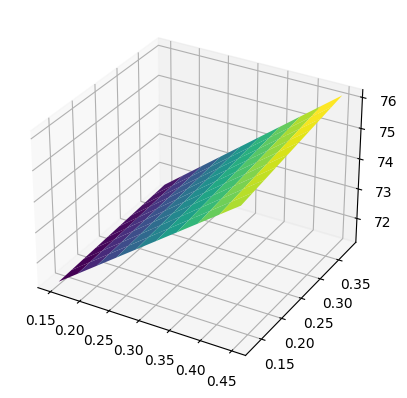

In [22]:
import matplotlib.pyplot as plt

u, y = np.meshgrid(
    np.linspace(factor_24_levels['U']['-1'], factor_24_levels['U']['1'], 10),
    np.linspace(factor_24_levels['Y']['-1'], factor_24_levels['Y']['1'], 10),
    )

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})


ax.plot_surface(u, y, 
                lm.predict(pd.DataFrame(
                    {
                        'U': u.ravel(), 
                        'A': np.ones_like(u.ravel())*factor_24_levels['A']['0'],  
                        'Y':y.ravel(),
                        'P': np.ones_like(u.ravel())*factor_24_levels['P']['0']
                    })).values.reshape(u.shape), cmap='viridis', edgecolor='none')

# Central Composite Rotational Design

In [92]:
ccrm_table = StringIO("""
U	Y	FPase	CMCase	Bglucosidase
-1	-1	158	4029	727
-1	1	171	4354	1119
1	-1	166	5302	1080
1	1	244	5513	1101
-1.41	0	148	4481	743
1.41	0	263	6529	1213
0	-1.41	208	5460	1085
0	1.41	255	7105	1435
0	0	250	5364	1390
0	0	269	5524	1499
0	0	261	5793	1420
""")
ccrm_table = pd.read_table(ccrm_table, delimiter='\t')
ccrm_table

,U,Y,FPase,CMCase,Bglucosidase
0,-1.00,-1.00,158,4029,727
1,-1.00,1.00,171,4354,1119
2,1.00,-1.00,166,5302,1080
3,1.00,1.00,244,5513,1101
4,-1.41,0.00,148,4481,743
5,1.41,0.00,263,6529,1213
6,0.00,-1.41,208,5460,1085
7,0.00,1.41,255,7105,1435
8,0.00,0.00,250,5364,1390
9,0.00,0.00,269,5524,1499


In [93]:
ccrm_levels = StringIO("""
	-1.41	-1	0	1	1.41
U	0.07	0.4	1.2	2	2.33
Y	0	0.09	0.29	0.5	0.59
""")

ccrm_levels = pd.read_table(ccrm_levels, delimiter='\s+').T
ccrm_levels

,U,Y
-1.41,0.07,0.00
-1,0.40,0.09
0,1.20,0.29
1,2.00,0.50
1.41,2.33,0.59


In [94]:
to_int = lambda x: int(x) if not x%1 else x

def substitute_leveles(table, levels, columns=['U', 'Y']):
    for column in columns:
        for i,val in enumerate(table[column]):
            table[column][i] = levels[column][f"{to_int(val)}"]
    return table

#ccrm_table = substitute_leveles(ccrm_table, ccrm_levels, columns=['U', 'Y'])

In [95]:
ccrm_table

,U,Y,FPase,CMCase,Bglucosidase
0,-1.00,-1.00,158,4029,727
1,-1.00,1.00,171,4354,1119
2,1.00,-1.00,166,5302,1080
3,1.00,1.00,244,5513,1101
4,-1.41,0.00,148,4481,743
5,1.41,0.00,263,6529,1213
6,0.00,-1.41,208,5460,1085
7,0.00,1.41,255,7105,1435
8,0.00,0.00,250,5364,1390
9,0.00,0.00,269,5524,1499


In [96]:
import seaborn as sns

#sns.paretoplot(ccrm_table, x='FPase', y='CMCase')

In [97]:
U = ccrm_table.U
Y = ccrm_table.Y
FPase = ccrm_table.FPase
CMCase = ccrm_table.CMCase
Bglucosidase = ccrm_table.Bglucosidase


In [103]:
formula = "FPase ~ 1 + np.power(U,2) + np.power(Y,2) + U + Y"
#formula = "FPase ~ 1 + U*Y"
lm = ols(formula, ccrm_table).fit(cov_type='HC1')
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  FPase   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     40.97
Date:                Tue, 04 Jul 2023   Prob (F-statistic):           0.000172
Time:                        22:03:46   Log-Likelihood:                -48.541
No. Observations:                  11   AIC:                             107.1
Df Residuals:                       6   BIC:                             109.1
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        260.1329      6.090     42.

/home/ppiper/micromamba/envs/explain/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [101]:
lm.predict(ccrm_table[['U','Y']])

0     151.198589
1     190.633408
2     212.167471
3     251.602290
4     145.766835
5     231.732960
6     186.948350
7     242.551445
8     260.132884
9     260.132884
10    260.132884
dtype: float64

In [87]:
anova_lm(lm, type=3)

,df,sum_sq,mean_sq,F,PR(>F)
U,1.0,7416.708221,7416.708221,4.467398,0.072400
Y,1.0,2992.923214,2992.923214,1.802765,0.221284
U:Y,1.0,1023.800184,1023.800184,0.616678,0.458035
Residual,7.0,11621.295654,1660.185093,NaN,NaN


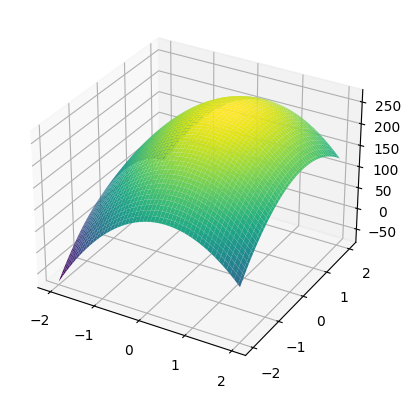

In [104]:
import matplotlib.pyplot as plt

u, y = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(u, y, lm.predict(pd.DataFrame({'U':u.ravel(), 'Y':y.ravel()})).values.reshape(u.shape), cmap='viridis', edgecolor='none')

In [158]:
print(anova_lm(lm))
print(anova_lm(lm, typ=2))
print(anova_lm(lm, typ=3))

                 df       sum_sq      mean_sq          F    PR(>F)
np.power(U, 2)  1.0  5238.703393  5238.703393   7.170140  0.036648
np.power(Y, 2)  1.0  2919.008634  2919.008634   3.995206  0.092580
U               1.0  7412.291881  7412.291881  10.145101  0.018952
Y               1.0  3100.956959  3100.956959   4.244237  0.085038
Residual        6.0  4383.766405   730.627734        NaN       NaN
                     sum_sq   df          F    PR(>F)
np.power(U, 2)  9752.809998  1.0  13.348535  0.010661
np.power(Y, 2)  5103.700455  1.0   6.985364  0.038387
U               5150.625231  1.0   7.049589  0.037770
Y               2587.068492  1.0   3.540885  0.108894
Residual        4383.766405  6.0        NaN       NaN
                      sum_sq   df            F        PR(>F)
Intercept       1.332973e+06  1.0  1824.422117  1.102008e-08
np.power(U, 2)  9.752810e+03  1.0    13.348535  1.066091e-02
np.power(Y, 2)  5.103700e+03  1.0     6.985364  3.838696e-02
U               5.150625e+03  

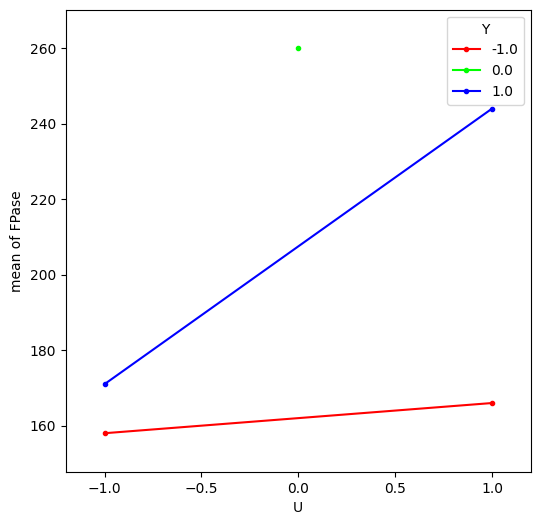

In [176]:
from matplotlib import pyplot as plt


fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(
    x=U.drop([4,5,6,7]),
    trace=Y.drop([4,5,6,7]),
    response=FPase.drop([4,5,6,7]),
    #colors=["red", "blue"],
    #markers=["D", "^"],
    #ms=10,
    ax=ax,
)


In [116]:
# base code
import numpy as np
import seaborn as sns
from statsmodels.tools.tools import maybe_unwrap_results
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from typing import Type
import statsmodels

style_talk = 'seaborn-talk'    #refer to plt.style.available

class LinearRegDiagnostic():
    """
    Diagnostic plots to identify potential problems in a linear regression fit.
    Mainly,
        a. non-linearity of data
        b. Correlation of error terms
        c. non-constant variance
        d. outliers
        e. high-leverage points
        f. collinearity

    Authors:
        Prajwal Kafle (p33ajkafle@gmail.com, where 3 = r)
        Does not come with any sort of warranty.
        Please test the code one your end before using.

        Matt Spinelli (m3spinelli@gmail.com, where 3 = r)
        (1) Fixed incorrect annotation of the top most extreme residuals in
            the Residuals vs Fitted and, especially, the Normal Q-Q plots.
        (2) Changed Residuals vs Leverage plot to match closer the y-axis
            range shown in the equivalent plot in the R package ggfortify.
        (3) Added horizontal line at y=0 in Residuals vs Leverage plot to
            match the plots in R package ggfortify and base R.
        (4) Added option for placing a vertical guideline on the Residuals
            vs Leverage plot using the rule of thumb of h = 2p/n to denote
            high leverage (high_leverage_threshold=True).
        (5) Added two more ways to compute the Cook's Distance (D) threshold:
            * 'baseR': D > 1 and D > 0.5 (default)
            * 'convention': D > 4/n
            * 'dof': D > 4 / (n - k - 1)
        (6) Fixed class name to conform to Pascal casing convention
        (7) Fixed Residuals vs Leverage legend to work with loc='best'
    """

    def __init__(self,
                 results: Type[statsmodels.regression.linear_model.RegressionResultsWrapper]) -> None:
        """
        For a linear regression model, generates following diagnostic plots:

        a. residual
        b. qq
        c. scale location and
        d. leverage

        and a table

        e. vif

        Args:
            results (Type[statsmodels.regression.linear_model.RegressionResultsWrapper]):
                must be instance of statsmodels.regression.linear_model object

        Raises:
            TypeError: if instance does not belong to above object

        Example:
        >>> import numpy as np
        >>> import pandas as pd
        >>> import statsmodels.formula.api as smf
        >>> x = np.linspace(-np.pi, np.pi, 100)
        >>> y = 3*x + 8 + np.random.normal(0,1, 100)
        >>> df = pd.DataFrame({'x':x, 'y':y})
        >>> res = smf.ols(formula= "y ~ x", data=df).fit()
        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls(plot_context="seaborn-paper")

        In case you do not need all plots you can also independently make an individual plot/table
        in following ways

        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls.residual_plot()
        >>> cls.qq_plot()
        >>> cls.scale_location_plot()
        >>> cls.leverage_plot()
        >>> cls.vif_table()
        """

        if isinstance(results, statsmodels.regression.linear_model.RegressionResultsWrapper) is False:
            raise TypeError("result must be instance of statsmodels.regression.linear_model.RegressionResultsWrapper object")

        self.results = maybe_unwrap_results(results)

        self.y_true = self.results.model.endog
        self.y_predict = self.results.fittedvalues
        self.xvar = self.results.model.exog
        self.xvar_names = self.results.model.exog_names

        self.residual = np.array(self.results.resid)
        influence = self.results.get_influence()
        self.residual_norm = influence.resid_studentized_internal
        self.leverage = influence.hat_matrix_diag
        self.cooks_distance = influence.cooks_distance[0]
        self.nparams = len(self.results.params)
        self.nresids = len(self.residual_norm)

    def __call__(self, plot_context='seaborn-paper', **kwargs):
        # print(plt.style.available)
        with plt.style.context(plot_context):
            fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
            self.residual_plot(ax=ax[0,0])
            self.qq_plot(ax=ax[0,1])
            self.scale_location_plot(ax=ax[1,0])
            self.leverage_plot(
                ax=ax[1,1],
                high_leverage_threshold = kwargs.get('high_leverage_threshold'),
                cooks_threshold = kwargs.get('cooks_threshold'))
            plt.show()

        return self.vif_table(), fig, ax,

    def residual_plot(self, ax=None):
        """
        Residual vs Fitted Plot

        Graphical tool to identify non-linearity.
        (Roughly) Horizontal red line is an indicator that the residual has a linear pattern
        """
        if ax is None:
            fig, ax = plt.subplots()

        sns.residplot(
            x=self.y_predict,
            y=self.residual,
            lowess=True,
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        residual_abs = np.abs(self.residual)
        abs_resid = np.flip(np.argsort(residual_abs), 0)
        abs_resid_top_3 = abs_resid[:3]
        for i in abs_resid_top_3:
            ax.annotate(
                i,
                xy=(self.y_predict[i], self.residual[i]),
                color='C3')

        ax.set_title('Residuals vs Fitted', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel('Residuals')
        return ax

    def qq_plot(self, ax=None):
        """
        Standarized Residual vs Theoretical Quantile plot

        Used to visually check if residuals are normally distributed.
        Points spread along the diagonal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        QQ = ProbPlot(self.residual_norm)
        fig = QQ.qqplot(line='45', alpha=0.5, lw=1, ax=ax)

        # annotations
        abs_norm_resid = np.flip(np.argsort(np.abs(self.residual_norm)), 0)
        abs_norm_resid_top_3 = abs_norm_resid[:3]
        for i, x, y in self.__qq_top_resid(QQ.theoretical_quantiles, abs_norm_resid_top_3):
            ax.annotate(
                i,
                xy=(x, y),
                ha='right',
                color='C3')

        ax.set_title('Normal Q-Q', fontweight="bold")
        ax.set_xlabel('Theoretical Quantiles')
        ax.set_ylabel('Standardized Residuals')
        return ax

    def scale_location_plot(self, ax=None):
        """
        Sqrt(Standarized Residual) vs Fitted values plot

        Used to check homoscedasticity of the residuals.
        Horizontal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        residual_norm_abs_sqrt = np.sqrt(np.abs(self.residual_norm))

        ax.scatter(self.y_predict, residual_norm_abs_sqrt, alpha=0.5);
        sns.regplot(
            x=self.y_predict,
            y=residual_norm_abs_sqrt,
            scatter=False, ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        abs_sq_norm_resid = np.flip(np.argsort(residual_norm_abs_sqrt), 0)
        abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
        for i in abs_sq_norm_resid_top_3:
            ax.annotate(
                i,
                xy=(self.y_predict[i], residual_norm_abs_sqrt[i]),
                color='C3')

        ax.set_title('Scale-Location', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel(r'$\sqrt{|\mathrm{Standardized\ Residuals}|}$');
        return ax

    def leverage_plot(self, ax=None, high_leverage_threshold=False, cooks_threshold='baseR'):
        """
        Residual vs Leverage plot

        Points falling outside Cook's distance curves are considered observation that can sway the fit
        aka are influential.
        Good to have none outside the curves.
        """
        if ax is None:
            fig, ax = plt.subplots()

        ax.scatter(
            self.leverage,
            self.residual_norm,
            alpha=0.5);

        sns.regplot(
            x=self.leverage,
            y=self.residual_norm,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        leverage_top_3 = np.flip(np.argsort(self.cooks_distance), 0)[:3]
        for i in leverage_top_3:
            ax.annotate(
                i,
                xy=(self.leverage[i], self.residual_norm[i]),
                color = 'C3')

        factors = []
        if cooks_threshold == 'baseR' or cooks_threshold is None:
            factors = [1, 0.5]
        elif cooks_threshold == 'convention':
            factors = [4/self.nresids]
        elif cooks_threshold == 'dof':
            factors = [4/ (self.nresids - self.nparams)]
        else:
            raise ValueError("threshold_method must be one of the following: 'convention', 'dof', or 'baseR' (default)")
        for i, factor in enumerate(factors):
            label = "Cook's distance" if i == 0 else None
            xtemp, ytemp = self.__cooks_dist_line(factor)
            ax.plot(xtemp, ytemp, label=label, lw=1.25, ls='--', color='red')
            ax.plot(xtemp, np.negative(ytemp), lw=1.25, ls='--', color='red')

        if high_leverage_threshold:
            high_leverage = 2 * self.nparams / self.nresids
            if max(self.leverage) > high_leverage:
                ax.axvline(high_leverage, label='High leverage', ls='-.', color='purple', lw=1)

        ax.axhline(0, ls='dotted', color='black', lw=1.25)
        ax.set_xlim(0, max(self.leverage)+0.01)
        ax.set_ylim(min(self.residual_norm)-0.1, max(self.residual_norm)+0.1)
        ax.set_title('Residuals vs Leverage', fontweight="bold")
        ax.set_xlabel('Leverage')
        ax.set_ylabel('Standardized Residuals')
        plt.legend(loc='best')
        return ax

    def vif_table(self):
        """
        VIF table

        VIF, the variance inflation factor, is a measure of multicollinearity.
        VIF > 5 for a variable indicates that it is highly collinear with the
        other input variables.
        """
        vif_df = pd.DataFrame()
        vif_df["Features"] = self.xvar_names
        vif_df["VIF Factor"] = [variance_inflation_factor(self.xvar, i) for i in range(self.xvar.shape[1])]

        return (vif_df
                .sort_values("VIF Factor")
                .round(2))


    def __cooks_dist_line(self, factor):
        """
        Helper function for plotting Cook's distance curves
        """
        p = self.nparams
        formula = lambda x: np.sqrt((factor * p * (1 - x)) / x)
        x = np.linspace(0.001, max(self.leverage), 50)
        y = formula(x)
        return x, y


    def __qq_top_resid(self, quantiles, top_residual_indices):
        """
        Helper generator function yielding the index and coordinates
        """
        offset = 0
        quant_index = 0
        previous_is_negative = None
        for resid_index in top_residual_indices:
            y = self.residual_norm[resid_index]
            is_negative = y < 0
            if previous_is_negative == None or previous_is_negative == is_negative:
                offset += 1
            else:
                quant_index -= offset
            x = quantiles[quant_index] if is_negative else np.flip(quantiles, 0)[quant_index]
            quant_index += 1
            previous_is_negative = is_negative
            yield resid_index, x, y


In [117]:
cls = LinearRegDiagnostic(lm)

<Axes: title={'center': 'Scale-Location'}, xlabel='Fitted values', ylabel='$\\sqrt{|\\mathrm{Standardized\\ Residuals}|}$'>

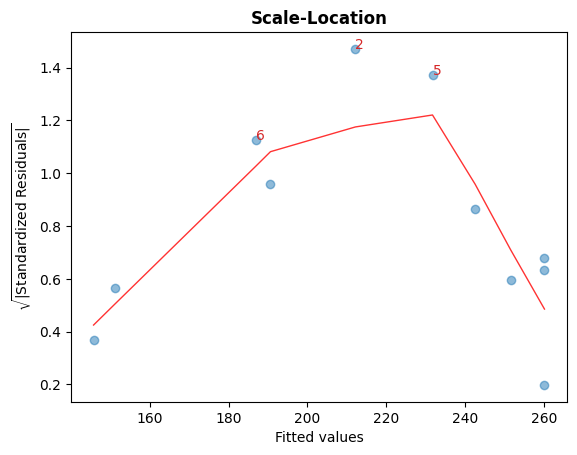

In [118]:
cls.scale_location_plot()

<Axes: title={'center': 'Residuals vs Leverage'}, xlabel='Leverage', ylabel='Standardized Residuals'>

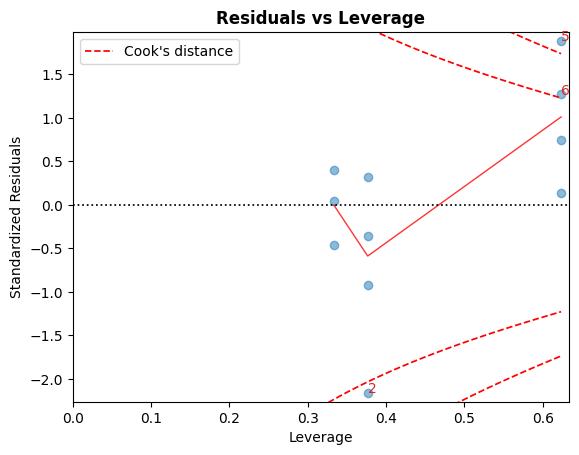

In [119]:
cls.leverage_plot()

<Axes: title={'center': 'Residuals vs Leverage'}, xlabel='Leverage', ylabel='Standardized Residuals'>

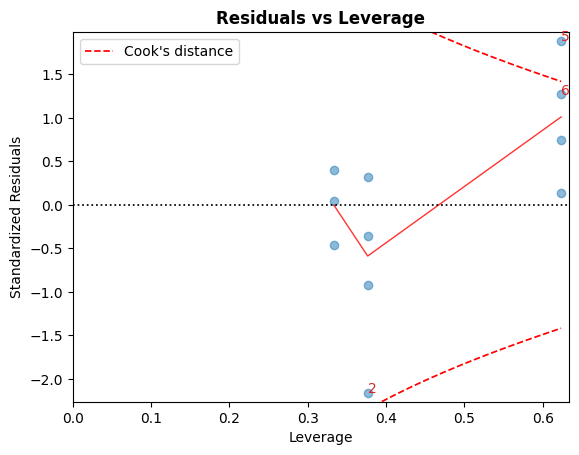

In [120]:
cls.leverage_plot(high_leverage_threshold=True, cooks_threshold='dof')

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


poly = PolynomialFeatures(degree=2, include_bias=True, interaction_only=True)
X = poly.fit_transform(ccrm_table[['U','Y']])
y = ccrm_table['FPase']
poly.fit(X, y)

lin = LinearRegression(fit_intercept=False)
lin.fit(X, y)

LinearRegression(fit_intercept=False)

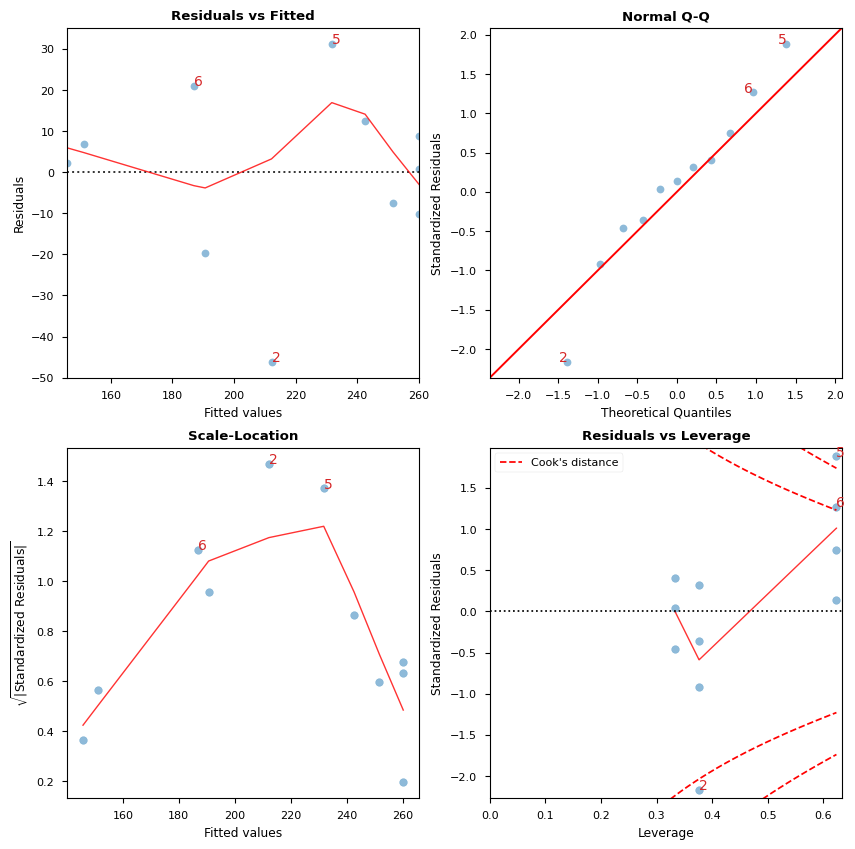

         Features  VIF Factor
4               Y        1.00
3               U        1.00
1  np.power(U, 2)        1.09
2  np.power(Y, 2)        1.09
0       Intercept        3.67


In [122]:
cls = LinearRegDiagnostic(lm)
vif, fig, ax = cls()
print(vif)

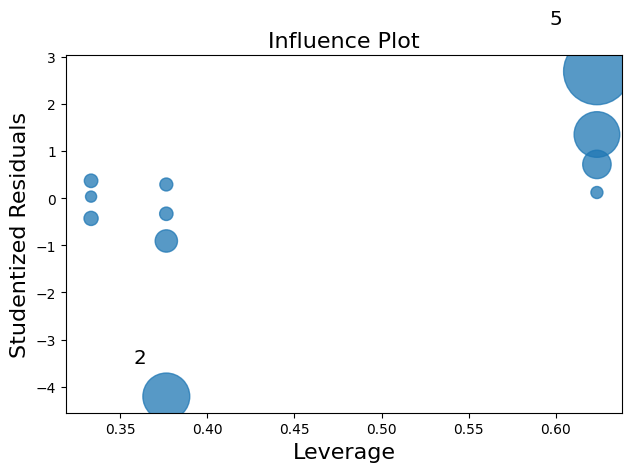

In [125]:
import statsmodels.api as sm
fig = sm.graphics.influence_plot(lm, criterion="cooks")
fig.tight_layout(pad=1.0)

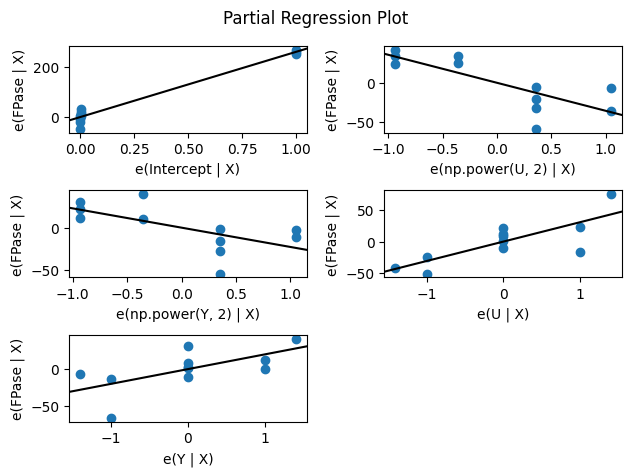

In [126]:
fig = sm.graphics.plot_partregress_grid(lm)
fig.tight_layout(pad=1.0)

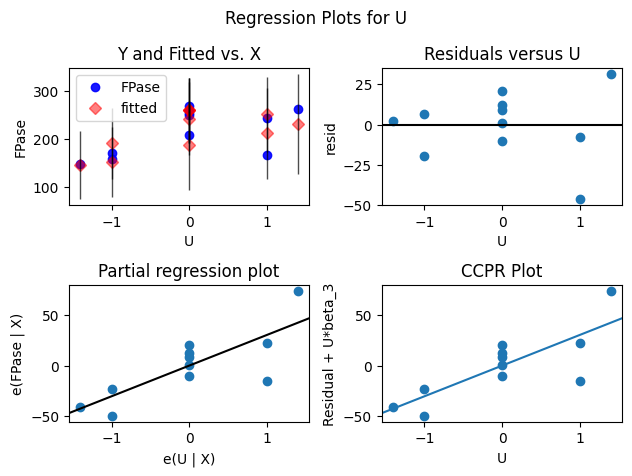

In [134]:
fig = sm.graphics.plot_regress_exog(lm, "U")
fig.tight_layout(pad=1.0)

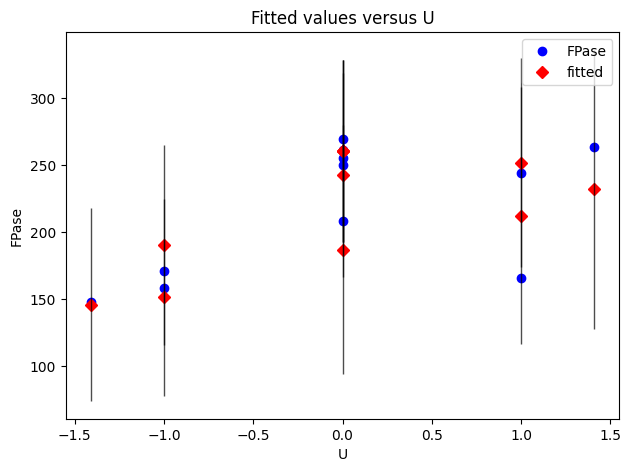

In [135]:
fig = sm.graphics.plot_fit(lm, "U")
fig.tight_layout(pad=1.0)

In [156]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
md = smf.mixedlm(formula, ccrm_table, groups=ccrm_table['U']
)
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())

           Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   FPase   
No. Observations:   11        Method:               REML    
No. Groups:         5         Scale:                326.9575
Min. group size:    1         Log-Likelihood:       -32.4547
Max. group size:    5         Converged:            Yes     
Mean group size:    2.2                                     
------------------------------------------------------------
                Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
------------------------------------------------------------
Intercept      244.867   26.460  9.254 0.000 193.006 296.727
np.power(U, 2) -25.384   18.836 -1.348 0.178 -62.302  11.534
np.power(Y, 2) -16.073    8.447 -1.903 0.057 -32.630   0.483
U               33.123   12.955  2.557 0.011   7.732  58.513
Y               19.717    6.402  3.080 0.002   7.169  32.266
Group Var      731.686   62.693                             



In [77]:
lin.coef_

array([178.70608014,   9.55336661, -23.52613987,  97.53696936])